# Alphalens Tear Sheets for
# Factor - Historical Returns 
# for Period: 1/1/2018 to 4/20/2020 (last 28 Months)

In [1]:
# Import all required libraries
# Quantopian Libraries
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.data import factset, USEquityPricing
from quantopian.pipeline.classifiers.fundamentals import Sector
from quantopian.pipeline.factors import Returns, SimpleMovingAverage, CustomFactor, RSI
# Alpha Lens libraries
from alphalens.performance import mean_information_coefficient
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_information_tear_sheet, create_returns_tear_sheet

## Define Your Alpha Factor Here

Spend your time in this cell, creating good factors. Then simply run the rest of the notebook to analyze

In [2]:
# Define the factor (Historic Returns) for the Pipeline function
# The Date Range used is Jan-1,2018 to Apr-30,2020 (ie 28 months)
def make_pipeline():    
   
    return Pipeline(
        columns={
        'hist_returns' : Returns(window_length=2) , 
        },
        screen=QTradableStocksUS()
    )

# Set the Start and End Dates for Factor Data
start_date='2018-01-01'
end_date='2020-04-30'

# Now run the Pipe 
factor_data = run_pipeline(make_pipeline(), start_date, end_date)


In [3]:
# Display factor data and notice the columns: Date, Equity and Historical Returns
print(type(factor_data))
print(len(factor_data))
factor_data.head()

<class 'pandas.core.frame.DataFrame'>
1279633


hist_returns
2018-01-02 00:00:00+00:00 Equity(2 [HWM])       -0.012855
                          Equity(24 [AAPL])     -0.010347
                          Equity(31 [ABAX])     -0.005823
                          Equity(41 [ARCB])     -0.016506
                          Equity(52 [ABM])      -0.004752

In [4]:
# Set the Start and End Dates and Get Pricing Data for the equities in the Factor Data
start_date='2018-01-01'
end_date='2020-05-31'  # End Date for Pricing Data should be > End Date for Factor Data for Forward Returns
pricing_data = get_pricing(factor_data.index.levels[1], start_date, end_date, fields='open_price')

In [5]:
# Display Pricing data and notice the columns: Date, Equity and Price
print(type(pricing_data))
print(len(pricing_data))
pricing_data.head()

<class 'pandas.core.frame.DataFrame'>
606


,Equity(2 [HWM]),Equity(24 [AAPL]),Equity(31 [ABAX]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),...,Equity(53352 [ORCC]),Equity(53353 [PHR]),Equity(53360 [IHRT]),Equity(53362 [MDLA]),Equity(53365 [AFYA]),Equity(53370 [HCAT]),Equity(53376 [NOVA]),Equity(53379 [LVGO]),Equity(53403 [DT]),Equity(53417 [INMD])
2018-01-02 00:00:00+00:00,26.835,164.326,49.347,34.650,35.880,188.13,55.748,14.222,105.34,76.489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,27.130,166.615,49.845,36.161,35.809,193.29,56.504,14.795,107.00,76.183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04 00:00:00+00:00,27.709,166.624,49.477,35.820,35.990,198.00,56.993,14.591,110.13,76.099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 00:00:00+00:00,28.741,167.493,50.791,35.820,36.656,200.78,56.552,14.552,113.07,76.666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08 00:00:00+00:00,29.164,168.372,54.872,35.187,37.151,208.24,56.370,14.446,110.42,77.066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Merge the Factor Data and Pricing Data using the Function from Alphalens
merged_data = get_clean_factor_and_forward_returns(
    factor = factor_data['hist_returns'],
    prices = pricing_data,
    quantiles=5,
    periods=(1,),
    max_loss=100,
)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 10000.0%, not exceeded: OK!


In [7]:
# Display Merged data and notice the columns
print(type(merged_data))
print(len(merged_data))
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
1279096


1D    factor  \
date                      asset                                   
2018-01-02 00:00:00+00:00 Equity(2 [HWM])    0.010993 -0.012855   
                          Equity(24 [AAPL])  0.013930 -0.010347   
                          Equity(31 [ABAX])  0.010092 -0.005823   
                          Equity(41 [ARCB])  0.043608 -0.016506   
                          Equity(52 [ABM])  -0.001979 -0.004752   

                                             factor_quantile  
date                      asset                               
2018-01-02 00:00:00+00:00 Equity(2 [HWM])                  2  
                          Equity(24 [AAPL])                2  
                          Equity(31 [ABAX])                3  
                          Equity(41 [ARCB])                1  
                          Equity(52 [ABM])                 3

Information Analysis


,1D
IC Mean,0.000
IC Std.,0.126
Risk-Adjusted IC,0.002
t-stat(IC),0.045
p-value(IC),0.964
IC Skew,-0.099
IC Kurtosis,0.653


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


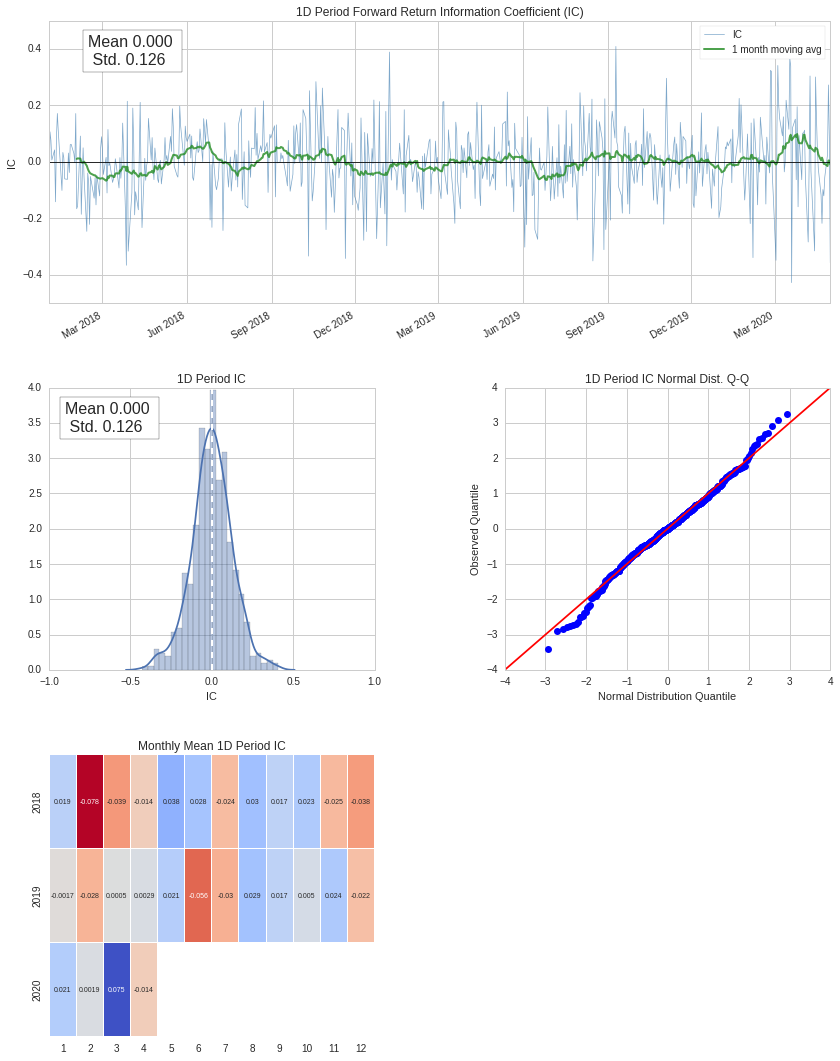

In [8]:
# Create Information Tear Sheets using Alphalens
create_information_tear_sheet(merged_data)

Returns Analysis


,1D
Ann. alpha,0.057
beta,-0.137
Mean Period Wise Return Top Quantile (bps),2.518
Mean Period Wise Return Bottom Quantile (bps),-1.964
Mean Period Wise Spread (bps),4.482


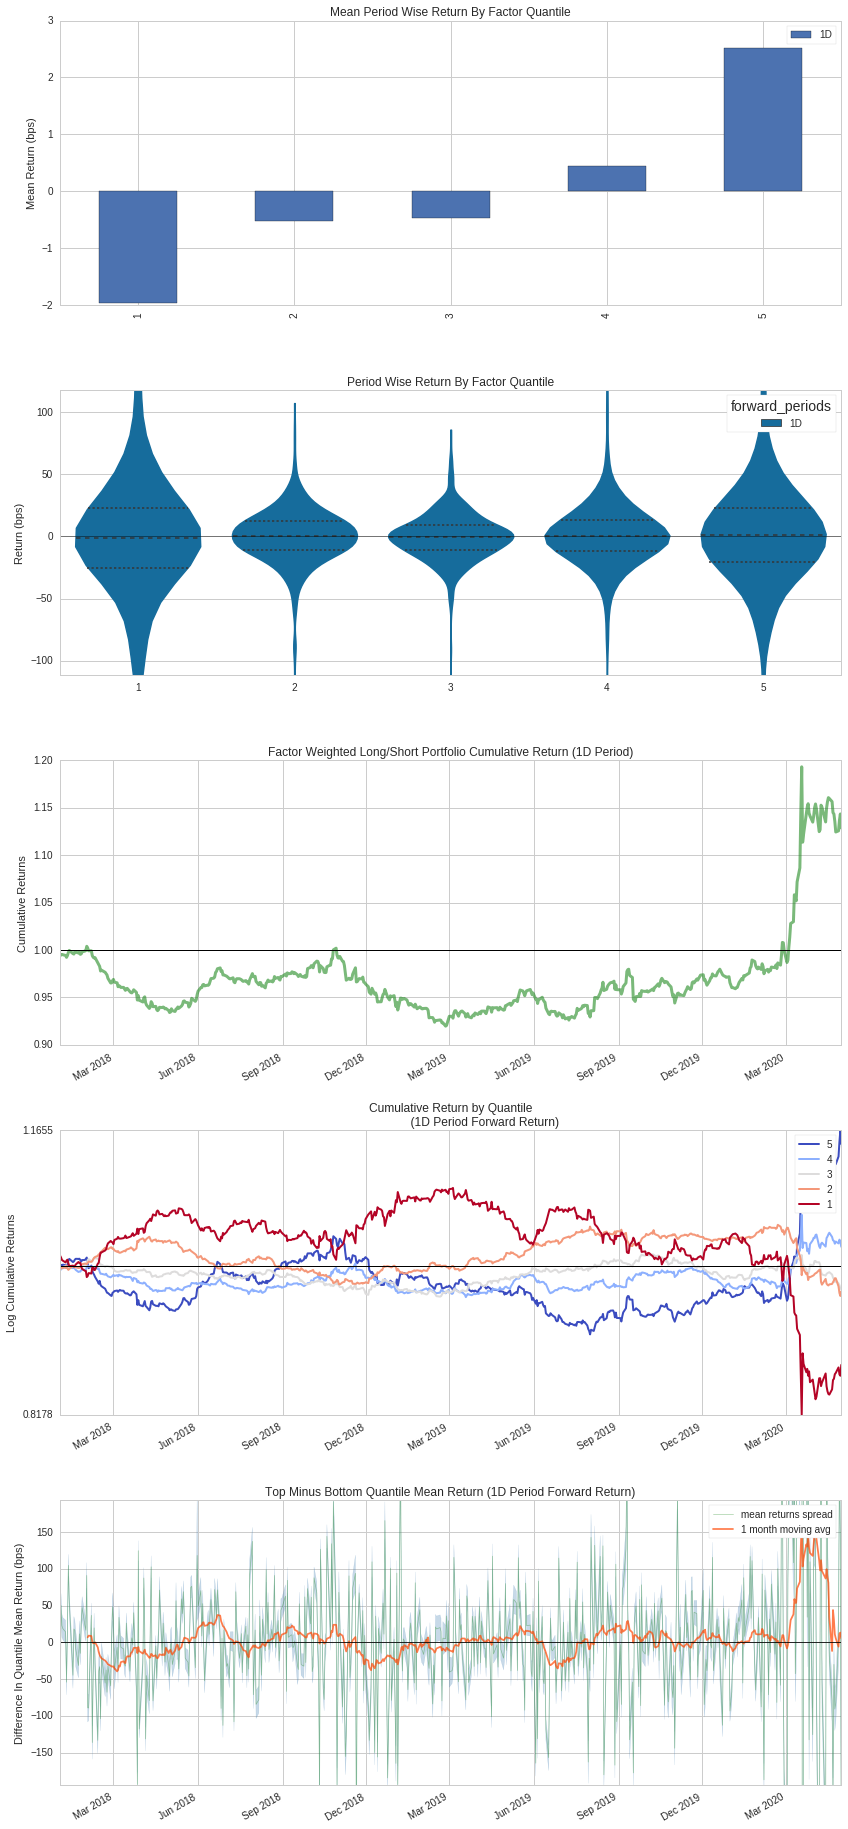

In [9]:
# Create Returns Tear Sheets using Alphalens
create_returns_tear_sheet(merged_data)